## Importing Librabries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Preprocessing & Cleaning

In [32]:
df = pd.read_csv('sales_data_sample.csv', sep=',', 
                 encoding='cp1252')
df.head(5)

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN          Reims   NaN   
2  27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3             78934 Hillside Dr.           NaN       Pasadena    CA   
4                7734 Strong St.           NaN  San Francisco    CA   

  POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0      10022     USA       NaN              Yu             Kwai    Small  
1      51100  France      EMEA         Henriot             Paul    Small  
2      75508  France      EMEA        Da Cunha           Daniel   Medium  
3      90003     USA       NaN           Young            Julie   Medium  
4        NaN     USA       NaN           Brown            Julie   Medium  

[5 rows x 25 columns]

In [33]:
df.shape

(2823, 25)

In [34]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [36]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [37]:
df.duplicated().sum()

0

In [38]:
df.drop(['ORDERNUMBER', 'PRICEEACH', 'ORDERLINENUMBER', 'ORDERDATE',
         'PRODUCTCODE', 'PHONE', 'ADDRESSLINE2',
       'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTFIRSTNAME', 
       'CONTACTLASTNAME'], axis=1, inplace=True)

In [39]:
# Replace coded values with their month for 'MONTH_ID'
df['MONTH_ID'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',
                        5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                        9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
                       }, inplace=True)

In [40]:
df.sample(5)

QUANTITYORDERED    SALES   STATUS  QTR_ID MONTH_ID  YEAR_ID  \
1761               34  2166.14  Shipped       4      Nov     2004   
1302               20  1790.60  Shipped       2      Jun     2004   
2198               31  1384.46  Shipped       2      May     2003   
2515               31  2738.54  Shipped       4      Nov     2003   
2320               40  1780.40  Shipped       4      Dec     2004   

       PRODUCTLINE  MSRP                  CUSTOMERNAME  \
1761        Planes    68             giftsbymail.co.uk   
1302  Vintage Cars    87  Quebec Home Shopping Network   
2198   Motorcycles    40          Marseille Mini Autos   
2515         Ships    86                   CAF Imports   
2320  Vintage Cars    68              Gift Ideas Corp.   

                                ADDRESSLINE1       CITY COUNTRY DEALSIZE  
1761               Garden House Crowther Way      Cowes      UK    Small  
1302                      43 rue St. Laurent   Montreal  Canada    Small  
2198                    12, rue des Bouchers  Marseille  France    Small  
2515  Merchants House, 27-30 Merchant's Quay     Madrid   Spain    Small  
2320                        2440 Pompton St.   Glendale     USA    Small

## Data Analysis & Visualization

### Q1. Which Year Had The Most Sales? 

In [41]:
df1 = df.groupby('YEAR_ID')["SALES"].sum().reset_index()
df1

YEAR_ID       SALES
0     2003  3516979.54
1     2004  4724162.60
2     2005  1791486.71

In [56]:
def plot_sales(data, x_col, y_col, x_labels=None, title='Sales Over Time', xlabel="Time Period", ylabel='Sales (Millions)', color='teal'):
    """
    Plot a bar chart of sales data.
    
    Parameters:
    data(DataFrame): The data frame containing the sales data.
    x_col (str): The column name for the x-axis (e.g., years, months, quarters).
    y_col (str): The column name for the y-axis (sales).
    x_labels (list, optional): Custom labels for the x-axis ticks. Defaults to None.
    title (str, optional): The title of the plot. Defaults to 'Sales Over Time'.
    xlabel (str, optional): The label for the x-axis. Defaults to 'Time Period'.
    ylabel (str, optional): The label for the y-axis. Defaults to 'Sales (Millions)'.
    color (str, optional): The color of the bars. Defaults to 'teal'.
    """
    # Ensure the data is sorted by x_col
    data = data.sort_values(by=x_col)
    
    # Convert sales to millions
    #data[y_col] = data[y_col] / 1e6
    
    # Set theme
    sns.set_theme(font_scale=1.0)

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the data
    bars = ax.bar(data[x_col], data[y_col], color=color)

    # Set labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    # Set custom x-axis labels if provided
    if x_labels:
        ax.set_xticks(data[x_col])
        ax.set_xticklabels(x_labels)
    else:
        ax.set_xticks(data[x_col])
        ax.set_xticklabels(data[x_col].astype(str))

    # Add bar labels
    for bar in bars:
        label = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, label + 0.05, round(label, 0), ha='center', va='bottom')

    plt.show()

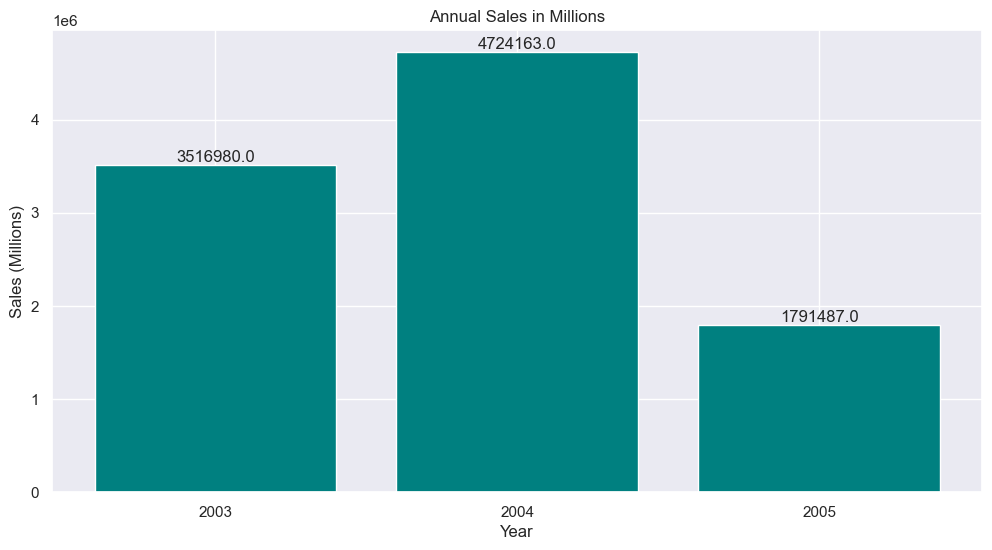

In [57]:
plot_sales(df1, 'YEAR_ID', 'SALES',  x_labels=['2003', '2004', '2005'], 
           title='Annual Sales in Millions', xlabel='Year')

This plot shows that, out the three years, 2024 had the highest revenue; however, the data for 2024 is limited to five months.

# Convert to millions
sales_in_millions = [SALE/1e6 for SALE in df1.SALES]

# Set theme
sns.set_theme(font_scale=1.0)

# Create the figure size
plt.figure(figsize=(8,4))

# Plot
fig, ax = plt.subplots()
bars = ax.bar(df1.YEAR_ID, df1.SALES, color='teal')

ax.bar(df1.YEAR_ID, df1.SALES)

# add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Sales (Millions)')
ax.set_title('Annual Sales in Millions')
ax.set_xticks(df1.YEAR_ID)
ax.set_xticklabels(['2003', '2004', '2005'])
ax.set_yticks(df1.SALES)


# Add bar labels
for bar, SALE in zip(bars, sales_in_millions):
    label = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, label+0.05 , round(label, 2), 
           ha='center', va='bottom')
    
plt.show();

### Q2. Which Month Had The Most Sales?

In [58]:
df2 = df.groupby('MONTH_ID')['SALES'].sum().reset_index()
df2.head()

MONTH_ID      SALES
0      Apr  669390.96
1      Aug  659310.57
2      Dec  634679.12
3      Feb  810441.90
4      Jan  785874.44

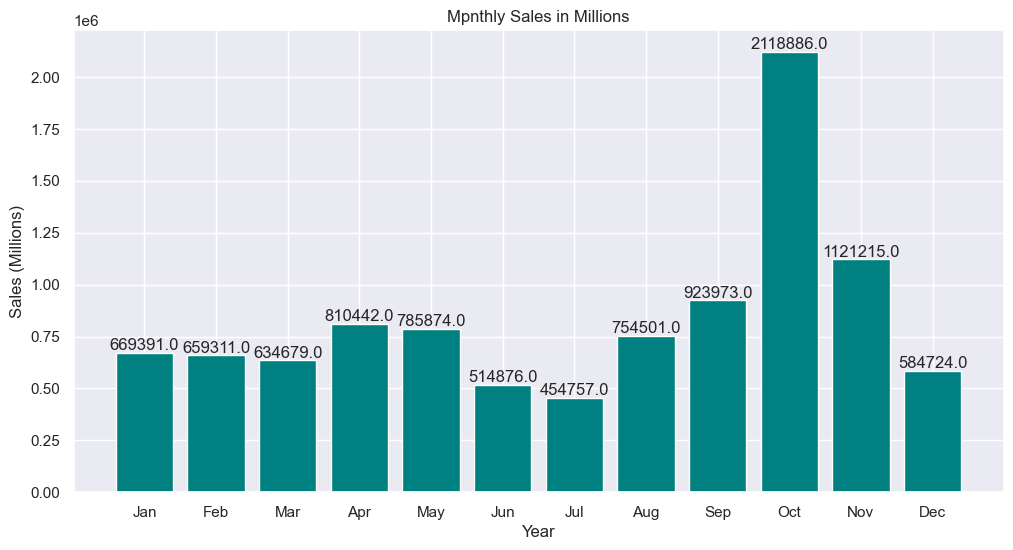

In [59]:
plot_sales(df2, 'MONTH_ID', 'SALES',  x_labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
           title='Mpnthly Sales in Millions', xlabel='Year')

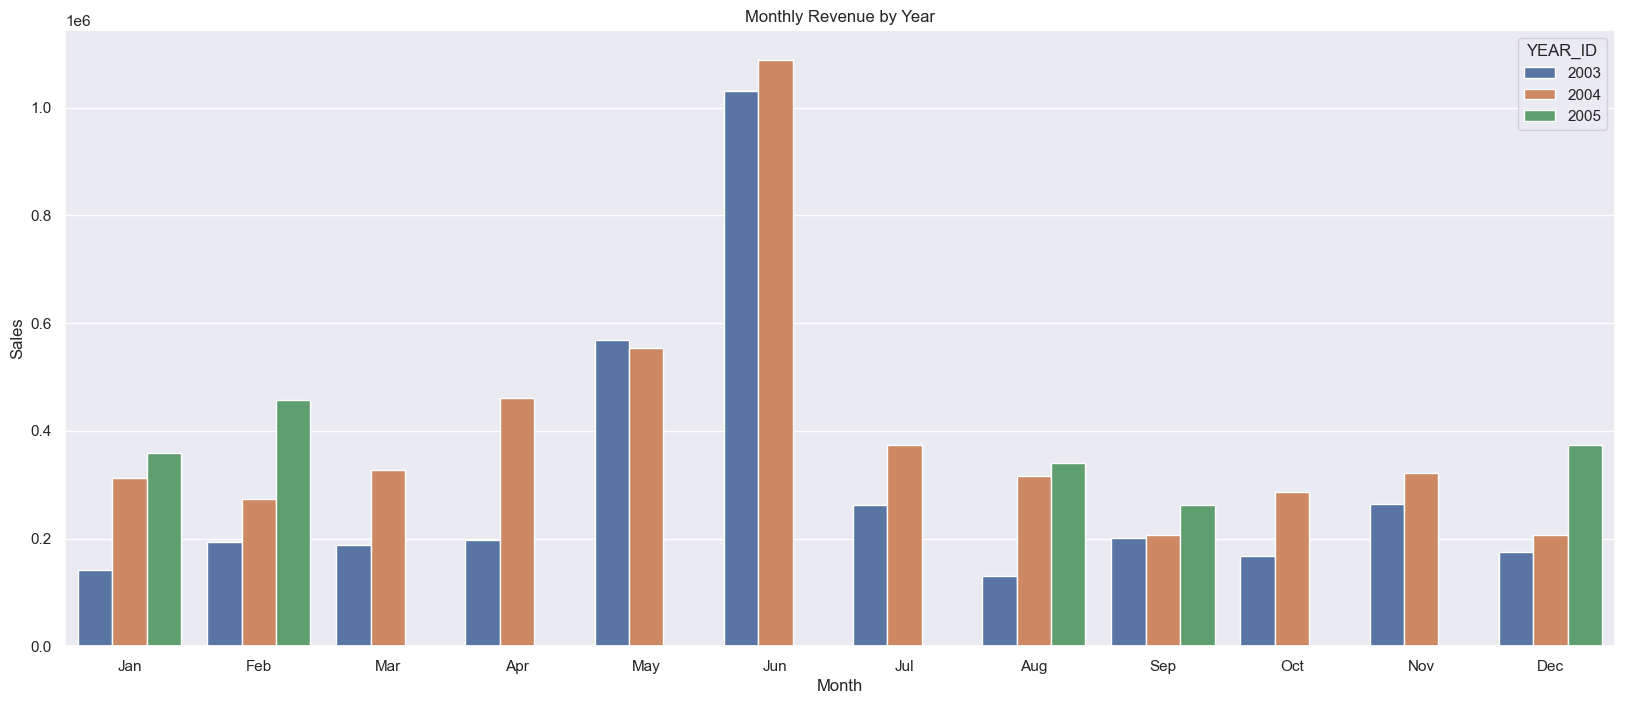

In [60]:
unique_months = df['MONTH_ID'].unique()
temp=pd.DataFrame()

x_labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create subplots for each year
for i, month in enumerate(unique_months):
    month_data = df[df['MONTH_ID'] == month]
    month_data = month_data.groupby('YEAR_ID')['SALES'].sum().reset_index()
    month_data['MONTH_ID'] = month
    temp = pd.concat([temp,month_data], ignore_index=True)
plt.figure(figsize=(20,8))
plt.title("Monthly Revenue by Year") # add title 
ax = sns.barplot(x='MONTH_ID',y='SALES',data=temp,hue='YEAR_ID')

# Set custom x-axis labels
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)

# Set x-axis label
ax.set_xlabel('Month')

# Set y-axis label
ax.set_ylabel('Sales')

plt.show()

### Q3. Which Country Had The Most Sales?

### Q4. Which Country Had More Sales Growth?

### Q5. Which Item Had Sold The Most in 2003?

### Q6. Which Item Had Sold The Most in 2004?

### Q7. Which Item Had Sold The Most in 2005?

### Q8. Who are the Top 20% Customers?

### Q9. Which Amount of Revenue is Contributed by the Top 20% of Customers?